<a href="https://colab.research.google.com/github/JoelByron/AI_Camp_TalentoTech/blob/main/notebooks/07_Procesamiento_de_imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

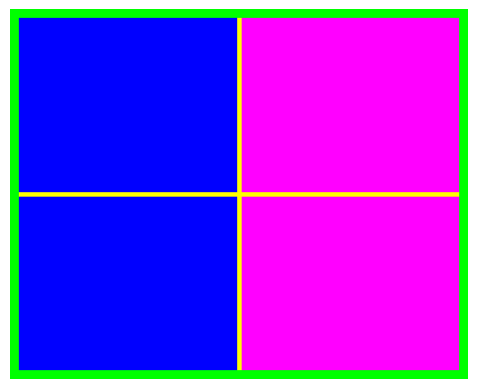

In [1]:
# Importar las librerías necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Crear una imagen de 500x400 píxeles
height, width = 400, 500
image = np.zeros((height, width, 3), dtype=np.uint8)

# Pintar mitad azul y mitad magenta
image[:, :width//2] = (255, 0, 0)  # Azul en OpenCV (BGR)
image[:, width//2:] = (255, 0, 255)  # Magenta en OpenCV (BGR)

# Dibujar una cruz amarilla en el centro
center_x, center_y = width // 2, height // 2
cv2.line(image, (center_x, 0), (center_x, height), (0, 255, 255), 3)  # Línea vertical amarilla
cv2.line(image, (0, center_y), (width, center_y), (0, 255, 255), 3)  # Línea horizontal amarilla

# Agregar un borde verde
image = cv2.copyMakeBorder(image, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=(0, 255, 0))

# Mostrar la imagen creada
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

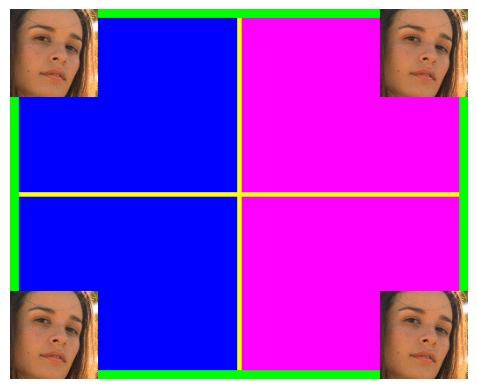

In [3]:
# Cargar una imagen de una persona
person_image = cv2.imread('/content/cara.jpg')  # Reemplaza con la ruta de tu imagen
gray_image = cv2.cvtColor(person_image, cv2.COLOR_BGR2GRAY)

# Cargar el clasificador de Haar para detección de caras
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detectar la cara en la imagen
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Verificar si se detectó al menos una cara
if len(faces) > 0:
    x, y, w, h = faces[0]  # Tomamos la primera cara detectada
    head_region = person_image[y:y+h, x:x+w]

    # Redimensionar la región de la cabeza para que se ajuste a las esquinas
    head_region_resized = cv2.resize(head_region, (100, 100))

    # Colocar la región de la cabeza en las cuatro esquinas de la imagen
    result_image = image.copy()
    result_image[:100, :100] = head_region_resized  # Esquina superior izquierda
    result_image[:100, -100:] = head_region_resized  # Esquina superior derecha
    result_image[-100:, :100] = head_region_resized  # Esquina inferior izquierda
    result_image[-100:, -100:] = head_region_resized  # Esquina inferior derecha

    # Mostrar la imagen final
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
else:
    print("No se detectó ninguna cara en la imagen.")

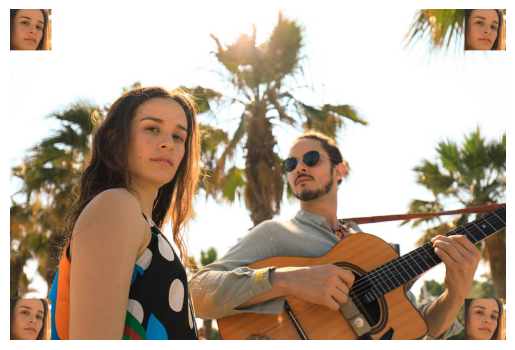

In [4]:
# Importar las librerías necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Cargar una imagen de una persona
person_image = cv2.imread('/content/cara.jpg')  # Reemplaza con la ruta de tu imagen
gray_image = cv2.cvtColor(person_image, cv2.COLOR_BGR2GRAY)

# Cargar el clasificador de Haar para detección de caras
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detectar la cara en la imagen
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Verificar si se detectó al menos una cara
if len(faces) > 0:
    x, y, w, h = faces[0]  # Tomamos la primera cara detectada
    head_region = person_image[y:y+h, x:x+w]

    # Redimensionar la región de la cabeza para que se ajuste a las esquinas
    head_region_resized = cv2.resize(head_region, (100, 100))

    # Colocar la región de la cabeza en las cuatro esquinas de la imagen
    result_image = person_image.copy()
    result_image[:100, :100] = head_region_resized  # Esquina superior izquierda
    result_image[:100, -100:] = head_region_resized  # Esquina superior derecha
    result_image[-100:, :100] = head_region_resized  # Esquina inferior izquierda
    result_image[-100:, -100:] = head_region_resized  # Esquina inferior derecha

    # Mostrar la imagen final
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()
else:
    print("No se detectó ninguna cara en la imagen.")